In [29]:
# Bibliotecas

# Manipulação de dados
import pandas as pd
import numpy as np

# Gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# SkLearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [30]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Análise Exploratória

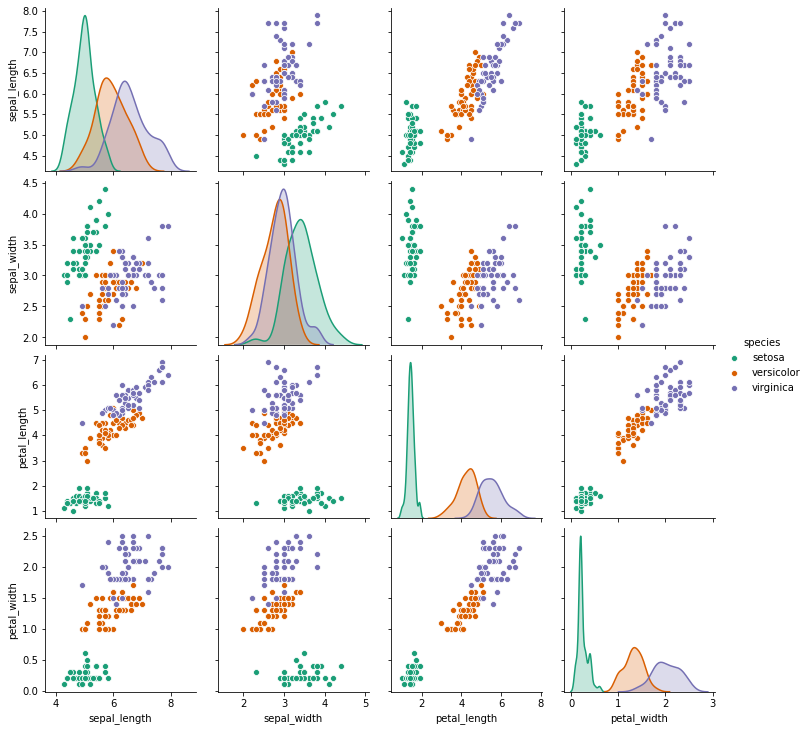

In [34]:
sns.pairplot(iris, hue='species', palette='Dark2')

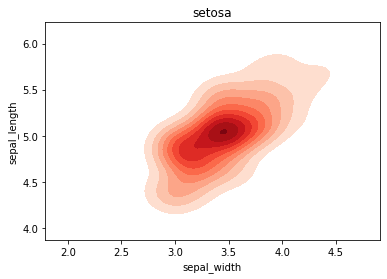

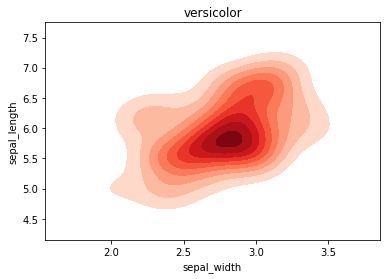

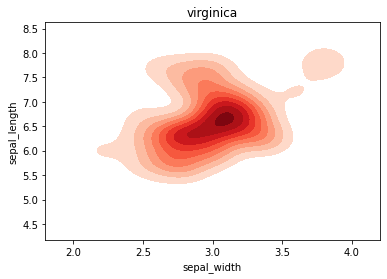

In [55]:
# Observando kdeplot para spepal_width x sepal_length
species_list = list(iris['species'].unique())
for s in species_list:
    plt.figure()
    plt.title(s)
    species = iris[iris['species'] == s]
    sns.kdeplot(species['sepal_width'], species['sepal_length'], cmap='Reds', shade=True, shade_lowest=False)

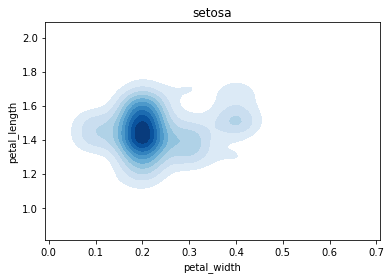

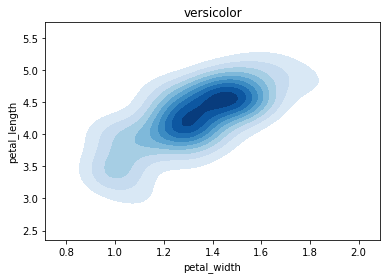

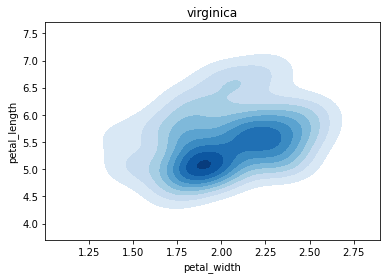

In [54]:
# Observando kdeplot para petal_width x petal_length
species_list = list(iris['species'].unique())
for s in species_list:
    plt.figure()
    plt.title(s)
    species = iris[iris['species'] == s]
    sns.kdeplot(species['petal_width'], species['petal_length'], cmap='Blues', shade=True, shade_lowest=False)

In [69]:
# Dividindo em X e y
y = iris['species']
X = iris.iloc[:,:-1]

In [119]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=13)

In [120]:
# Modelo SVC com parametros default
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9555555555555556

In [121]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [122]:
print(confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0 12  0]
 [ 0  2 17]]


In [123]:
# Testando parametros em GridSearchCV

param_grid = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 1000],
             'gamma': [1, 0.1, 0.01, 0.001]}

In [124]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.0001, gamma=1 ...............................................
[CV] ................... C=0.0001, gamma=1, score=0.333, total=   0.0s
[CV] C=0.0001, gamma=1 ...............................................
[CV] ................... C=0.0001, gamma=1, score=0.333, total=   0.0s
[CV] C=0.0001, gamma=1 ...............................................
[CV] ................... C=0.0001, gamma=1, score=0.381, total=   0.0s
[CV] C=0.0001, gamma=1 ...............................................
[CV] ................... C=0.0001, gamma=1, score=0.381, total=   0.0s
[CV] C=0.0001, gamma=1 ...............................................
[CV] ................... C=0.0001, gamma=1, score=0.381, total=   0.0s
[CV] C=0.0001, gamma=0.1 .............................................
[CV] ................. C=0.0001, gamma=0.1, score=0.333, total=   0.0s
[CV] C=0.0001, gamma=0.1 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.01, gamma=1, score=0.381, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.381, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.381, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.333, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.333, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.381, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.381, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [125]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [126]:
grid.score(X_test, y_test)

0.9777777777777777

In [127]:
y_pred_grid = grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [128]:
print(confusion_matrix(y_test, y_pred_grid))

[[14  0  0]
 [ 0 12  0]
 [ 0  1 18]]


In [133]:
acc = [svc.score(X_test, y_test), grid.score(X_test, y_test)]
precision = [precision_score(y_test, y_pred, average='macro'), precision_score(y_test, y_pred_grid, average='macro')]
recall = [recall_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred_grid, average='macro')]
f1score = [f1_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred_grid, average='macro')]

In [138]:
resultados = pd.DataFrame([acc, precision, recall, f1score], columns=['SVC_default', 'SVC_Grid'], index=['accuracy', 'precision', 'recall', 'f1_score'])
resultados

,SVC_default,SVC_Grid
accuracy,0.955556,0.977778
precision,0.952381,0.974359
recall,0.964912,0.982456
f1_score,0.955840,0.977658
